In [13]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import colors

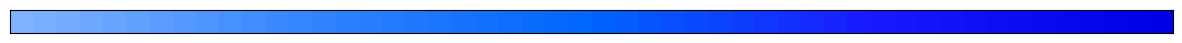

In [14]:
IMAGES_PATH = '.'
db_size = '100.0'
df_data = pd.read_csv(f'../data/classic_agent_history/agent_history_sf{db_size}_25epi.csv')
q_df_data = pd.read_csv(f'../data/hybrid_agent_history/quantum_agent_history_sf{db_size}_k0.00017_25epi.csv')
title_prefix = f'{db_size}MB_database'
episodes = 50
steps_per_episode = 100
max_iterations = episodes * steps_per_episode
step = 50


def make_Ramp(ramp_colors):
    from colour import Color
    from matplotlib.colors import LinearSegmentedColormap

    color_ramp = LinearSegmentedColormap.from_list('my_list', [Color(c1).rgb for c1 in ramp_colors])
    plt.figure(figsize=(15, 3))
    plt.imshow([list(np.arange(0, len(ramp_colors), 0.1))], interpolation='nearest', origin='lower', cmap=color_ramp)
    plt.xticks([])
    plt.yticks([])
    return color_ramp


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


# custom_cmap = make_Ramp(['#005ce6', '#069AF3', '#66ccff', '#ffbf80', '#ffa64d', '#ff7f0e', '#ffbb33'])
custom_cmap = make_Ramp(['#80b3ff', '#3385ff', '#0066ff', '#1a1aff', '#0000e6'])


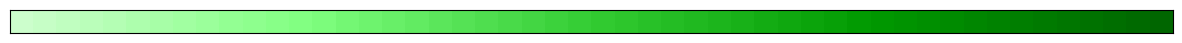

In [15]:
q_custom_cmap = make_Ramp(['#ccffcc', '#80ff80', '#33cc33', '#009900', '#006600'])

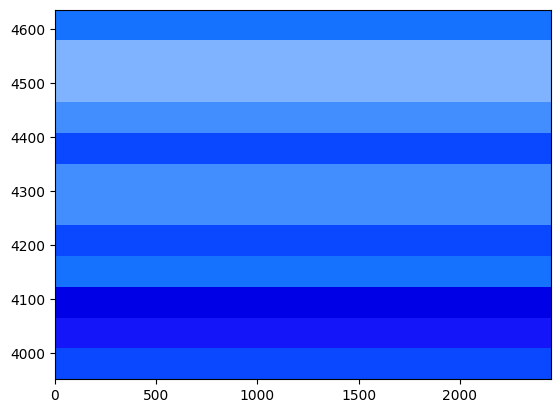

In [16]:
hist, x, y, _ = plt.hist2d(df_data[::step].index, df_data[::step]['initial_state_reward'], bins=(1, 12),
                           cmap=custom_cmap)
hist = [0.0, *hist[0], 0.0]
hist_intervals = pd.IntervalIndex.from_arrays(np.insert(y, 0, 0, axis=0),
                                              np.insert(y, y.size, np.inf, axis=0),
                                              closed='left')
df_data['hist'] = df_data['reward'].apply(
    lambda r: hist[hist_intervals.get_loc(r)] / (df_data.index.max() / step) * 100)



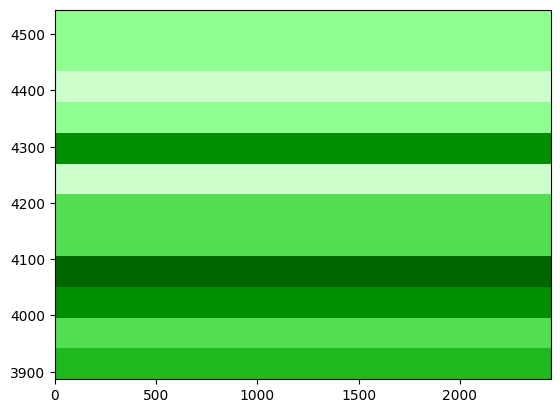

In [17]:
hist, x, y, _ = plt.hist2d(q_df_data[::step].index, q_df_data[::step]['initial_state_reward'], bins=(1, 12),
                           cmap=q_custom_cmap)
hist = [0.0, *hist[0], 0.0]
hist_intervals = pd.IntervalIndex.from_arrays(np.insert(y, 0, 0, axis=0),
                                              np.insert(y, y.size, np.inf, axis=0),
                                              closed='left')
q_df_data['hist'] = q_df_data['reward'].apply(
    lambda r: hist[hist_intervals.get_loc(r)] / (q_df_data.index.max() / step) * 100)

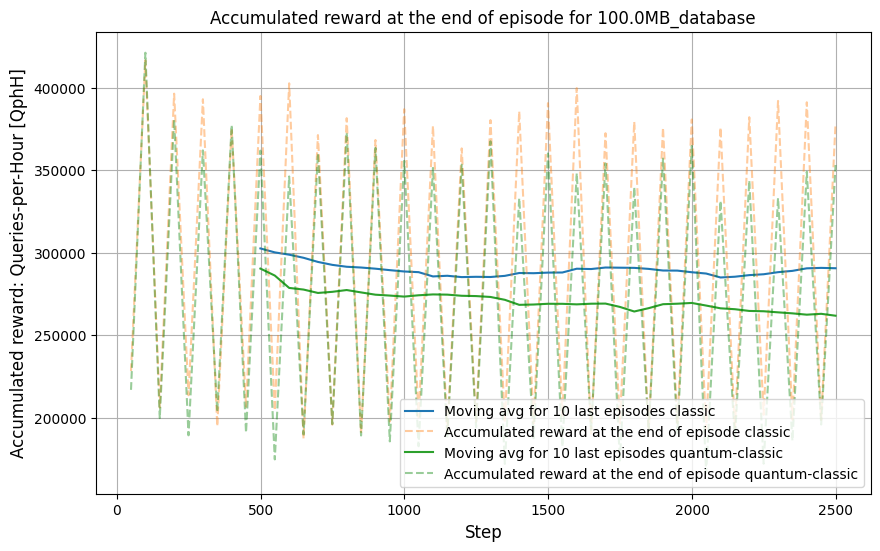

In [18]:
# total_reward
rolling_probe = step / 5
plt.figure(figsize=(10, 6))
plt.grid()
plt.ylabel('Accumulated reward: Queries-per-Hour [QphH]', fontsize=12)
plt.xlabel('Step', fontsize=12)
plt.title(f'Accumulated reward at the end of episode for {title_prefix}')

plt.plot(df_data['total_reward'][step - 1::step].rolling(window=int(rolling_probe)).mean(), '-',
         label=f'Moving avg for {int(rolling_probe)} last episodes classic')
plt.plot(df_data['total_reward'][step - 1::step], '--', alpha=0.4,
         label='Accumulated reward at the end of episode classic')

plt.plot(q_df_data['total_reward'][step - 1::step].rolling(window=int(rolling_probe)).mean(), '-',
         label=f'Moving avg for {int(rolling_probe)} last episodes quantum-classic')
plt.plot(q_df_data['total_reward'][step - 1::step], 'g--', alpha=0.4,
         label='Accumulated reward at the end of episode quantum-classic')

plt.legend(loc='lower right', fontsize=10)

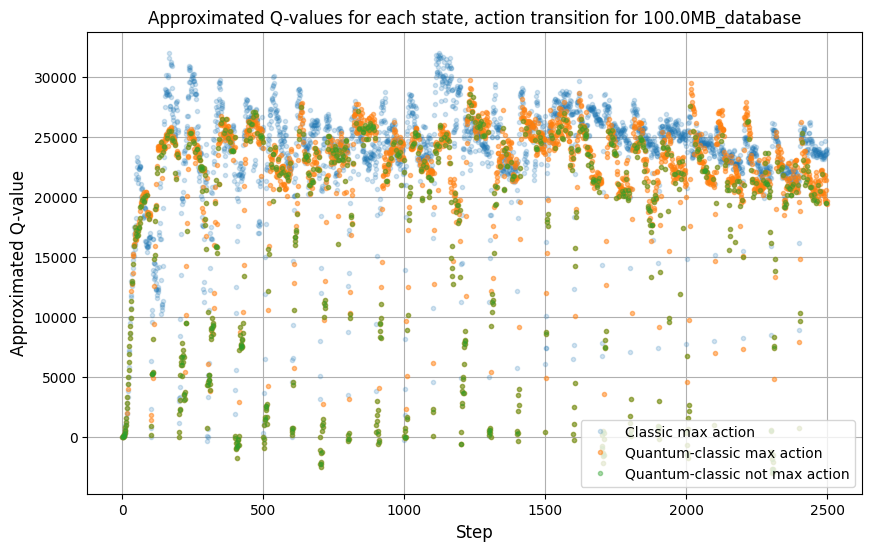

In [19]:
# aprox q
plt.figure(figsize=(10, 6))
plt.grid()
plt.ylabel('Approximated Q-value', fontsize=12)
plt.xlabel('Step', fontsize=12)
plt.title(f'Approximated Q-values for each state, action transition for {title_prefix}')
plt.plot(df_data['q'], '.', alpha=0.2, label='Classic max action')
plt.plot(q_df_data['q'], '.', alpha=0.5,label='Quantum-classic max action')
plt.plot(q_df_data[q_df_data['is_max_a'] == False]['q'], '.', alpha=0.4,label='Quantum-classic not max action')
plt.legend(loc='lower right', fontsize=10)

Text(0.5, 0, 'Step')

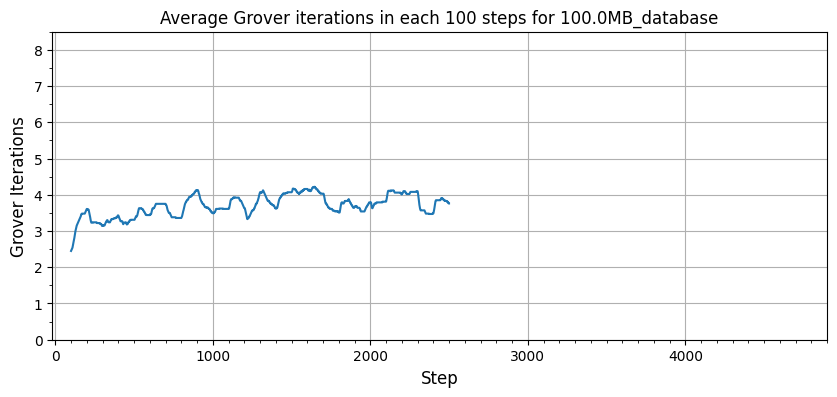

In [20]:
plt.figure(figsize=(10, 4))
plt.grid()

plt.plot(q_df_data['grover_iterations'].rolling(window=steps_per_episode).mean(), '-')
plt.title(f'Average Grover iterations in each {steps_per_episode} steps for {title_prefix}')

plt.yticks(np.arange(0, 9, step=0.5), minor=True)
plt.ylabel('Grover Iterations', fontsize=12)

plt.xticks(np.arange(steps_per_episode, max_iterations, step=steps_per_episode), minor=True)
plt.xlabel('Step', fontsize=12)

Text(0.5, 0, 'Step')

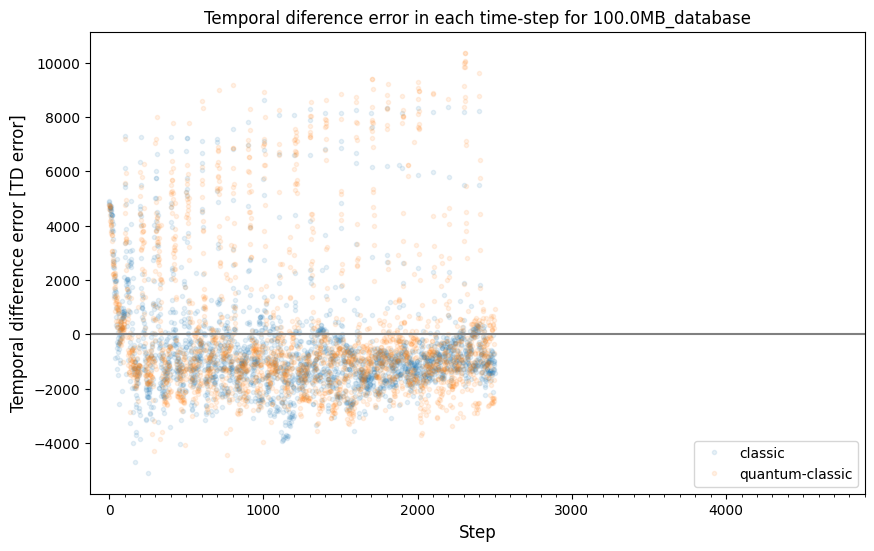

In [21]:

plt.figure(figsize=(10, 6))
plt.title(f'Temporal diference error in each time-step for {title_prefix}')
plt.plot(df_data['td_error'], '.', alpha=0.1, label='classic')
plt.plot(q_df_data['td_error'], '.', alpha=0.1, label='quantum-classic')
plt.axhline(y=0, color='grey')
plt.legend(loc='lower right', fontsize=10)

plt.ylabel('Temporal difference error [TD error]', fontsize=12)

plt.xticks(np.arange(0, max_iterations, step=steps_per_episode), minor=True)
plt.xlabel('Step', fontsize=12)


# Final Data

In [22]:
interval = 100
nr_slices = episodes

In [23]:
# Classic
# 			
data = {
        "initial_state_reward": [], "reward_average": [],
        "min_reward": [], "max_reward": [],
        "average_total_reward": [], "td_error_average": [],
        "sum_power_queries_exec_time_sec": [], "average_power_queries_exec_time_sec": [], 
        "sum_power_refresh_function_exec_time_sec": [], "average_power_refresh_function_exec_time_sec": [], 
        "sum_throughput_total_exec_time_sec": [], "average_throughput_total_exec_time_sec": [], 
        "sum_step_execution_time_seconds": []
        }

data_slice = df_data

data["initial_state_reward"].append(data_slice["initial_state_reward"].max())
data["reward_average"].append(data_slice["reward"].mean())
data["min_reward"].append(data_slice["reward"].min())
data["max_reward"].append(data_slice["reward"].max())
data["average_total_reward"].append(data_slice["total_reward"].rolling(window=steps_per_episode).max().mean())
data["td_error_average"].append(data_slice["td_error"].mean())

data["sum_power_queries_exec_time_sec"].append(data_slice["power_queries_exec_time_sum_sec"].sum())
data["average_power_queries_exec_time_sec"].append(data_slice["power_queries_exec_time_sum_sec"].mean())
data["sum_power_refresh_function_exec_time_sec"].append(data_slice["power_refresh_function_exec_time_sum_sec"].sum())
data["average_power_refresh_function_exec_time_sec"].append(data_slice["power_refresh_function_exec_time_sum_sec"].mean())
data["sum_throughput_total_exec_time_sec"].append(data_slice["throughput_total_exec_time_sec"].sum())
data["average_throughput_total_exec_time_sec"].append(data_slice["throughput_total_exec_time_sec"].mean())
data["sum_step_execution_time_seconds"].append(data_slice["step_execution_time_seconds"].sum())

pd.DataFrame(data).style.format(precision=3, decimal=".")

,initial_state_reward,reward_average,min_reward,max_reward,average_total_reward,td_error_average,sum_power_queries_exec_time_sec,average_power_queries_exec_time_sec,sum_power_refresh_function_exec_time_sec,average_power_refresh_function_exec_time_sec,sum_throughput_total_exec_time_sec,average_throughput_total_exec_time_sec,sum_step_execution_time_seconds
0,4635.529,3845.310,3025.776,5001.048,384839.044,-567.898,7885.523,3.154,1017.491,0.407,11260.883,4.504,21442.154


In [24]:
# Quantum-Classic

data = {
        "initial_state_reward": [], "reward_average": [],
        "min_reward": [], "max_reward": [],
        "average_total_reward": [], "td_error_average": [], "min_grover_iterations_average": [], "grover_iterations_average": [],
        "sum_power_queries_exec_time_sec": [], "average_power_queries_exec_time_sec": [], 
        "sum_power_refresh_function_exec_time_sec": [], "average_power_refresh_function_exec_time_sec": [], 
        "sum_throughput_total_exec_time_sec": [], "average_throughput_total_exec_time_sec": [], 
        "sum_step_execution_time_seconds": []
        }

data_slice = q_df_data

data["initial_state_reward"].append(data_slice["initial_state_reward"].max())
data["reward_average"].append(data_slice["reward"].mean())
data["min_reward"].append(data_slice["reward"].min())
data["max_reward"].append(data_slice["reward"].max())
data["average_total_reward"].append(data_slice["total_reward"].rolling(window=steps_per_episode).max().mean())
data["td_error_average"].append(data_slice["td_error"].mean())
data["min_grover_iterations_average"].append(float(data_slice["grover_iterations"].rolling(window=steps_per_episode).min().mean()))
data["grover_iterations_average"].append(data_slice["grover_iterations"].mean())

data["sum_power_queries_exec_time_sec"].append(data_slice["power_queries_exec_time_sum_sec"].sum())
data["average_power_queries_exec_time_sec"].append(data_slice["power_queries_exec_time_sum_sec"].mean())
data["sum_power_refresh_function_exec_time_sec"].append(data_slice["power_refresh_function_exec_time_sum_sec"].sum())
data["average_power_refresh_function_exec_time_sec"].append(data_slice["power_refresh_function_exec_time_sum_sec"].mean())
data["sum_throughput_total_exec_time_sec"].append(data_slice["throughput_total_exec_time_sec"].sum())
data["average_throughput_total_exec_time_sec"].append(data_slice["throughput_total_exec_time_sec"].mean())
data["sum_step_execution_time_seconds"].append(data_slice["step_execution_time_seconds"].sum())

pd.DataFrame(data).style.format(precision=3, decimal=".")

,initial_state_reward,reward_average,min_reward,max_reward,average_total_reward,td_error_average,min_grover_iterations_average,grover_iterations_average,sum_power_queries_exec_time_sec,average_power_queries_exec_time_sec,sum_power_refresh_function_exec_time_sec,average_power_refresh_function_exec_time_sec,sum_throughput_total_exec_time_sec,average_throughput_total_exec_time_sec,sum_step_execution_time_seconds
0,4543.572,3576.948,1971.251,4765.894,357993.590,-5.639,0.863,3.658,8155.802,3.262,1119.823,0.448,12529.784,5.012,23347.640
